# Case study: Feature Engineering - Ames house price prediction

In [106]:
# !pip install scikit-learn
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn


In [107]:
# used for manipulating directory paths
import os

# For N-dimensional array manipulation
import numpy as np

# For advanced mathematical routines
import scipy

# Plotting library
import matplotlib.pyplot as plt

# For data analysis and data structures in DataFrames 
import pandas as pd

# For data visualization
import seaborn as sns

# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics


# tells matplotlib to embed plots within the notebook
%matplotlib inline


## Steps

- *Step 1: Load dataset*<br>
- *Step 2: Exploratory data analysis and process dataset for ML*<br>
- *Step 3: Linear regression*<br>
- *Step 4: Train and evaluate a simple linear regression model*<br>
- *Step 5: Refine model using regularization*<br>

In [108]:
# Step 1 Load dataset 
## Implement a function to load dataset
def loadDataset(dirname, filename):
    df = pd.read_csv(dirname + filename)
    return df

In [109]:

house_data_df = loadDataset('Data/','AmesHousing.csv')

## Brielfy look at the data using 'shape', 'head', 'info' etc, functions. 

print(house_data_df.shape)

print("info:\n",house_data_df.info())


print("head10:\n",house_data_df.head(10))


print("describe:\n",house_data_df.describe())


# Print the count of values in 'Street' using value_counts() 
print("Count of street\n",house_data_df['Street'].value_counts())


(2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  Hou

In [145]:
# print all the data to see
house_data_df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [144]:
# Print the description of the dataset
print("Description of the dataset:\n")  
house_data_df.describe()

Description of the dataset:



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remodeled,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2925.000000,2435.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2924.000000,2924.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.396581,69.023819,10103.583590,6.088205,5.563761,1971.302906,1984.234188,100.710544,438.097469,49.807456,...,93.392137,47.166838,23.050940,2.596923,16.029402,1.893333,44.909744,6.216752,2007.791453,180411.574701
std,42.668752,22.710918,7781.999124,1.402953,1.112262,30.242474,20.861774,176.034290,438.032289,169.300590,...,126.034142,66.571810,64.186809,25.162589,56.131397,32.964272,472.237990,2.711541,1.317408,78554.857286
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7438.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9428.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.500000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11515.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.250000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,625000.000000


In [111]:
# Drop the 'Order' and 'PID' column 
house_data_df.drop(['Order'],axis=1, inplace = True)
house_data_df.drop(['PID'],axis=1, inplace = True)

# print the new dataframe shape

print('Shape after dropping Orfer and PID: \n', house_data_df.shape)

Shape after dropping Orfer and PID: 
 (2930, 80)


In [112]:
house_data_df.rename(columns={"Year Remod/Add": "Year Remodeled"}, inplace=True)
print(house_data_df.columns)

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remodeled', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [113]:
# List columns that are numeric in house_data_df
numeric_columns = house_data_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remodeled', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


Text(0.5, 1.02, 'Histograms of numerical features')

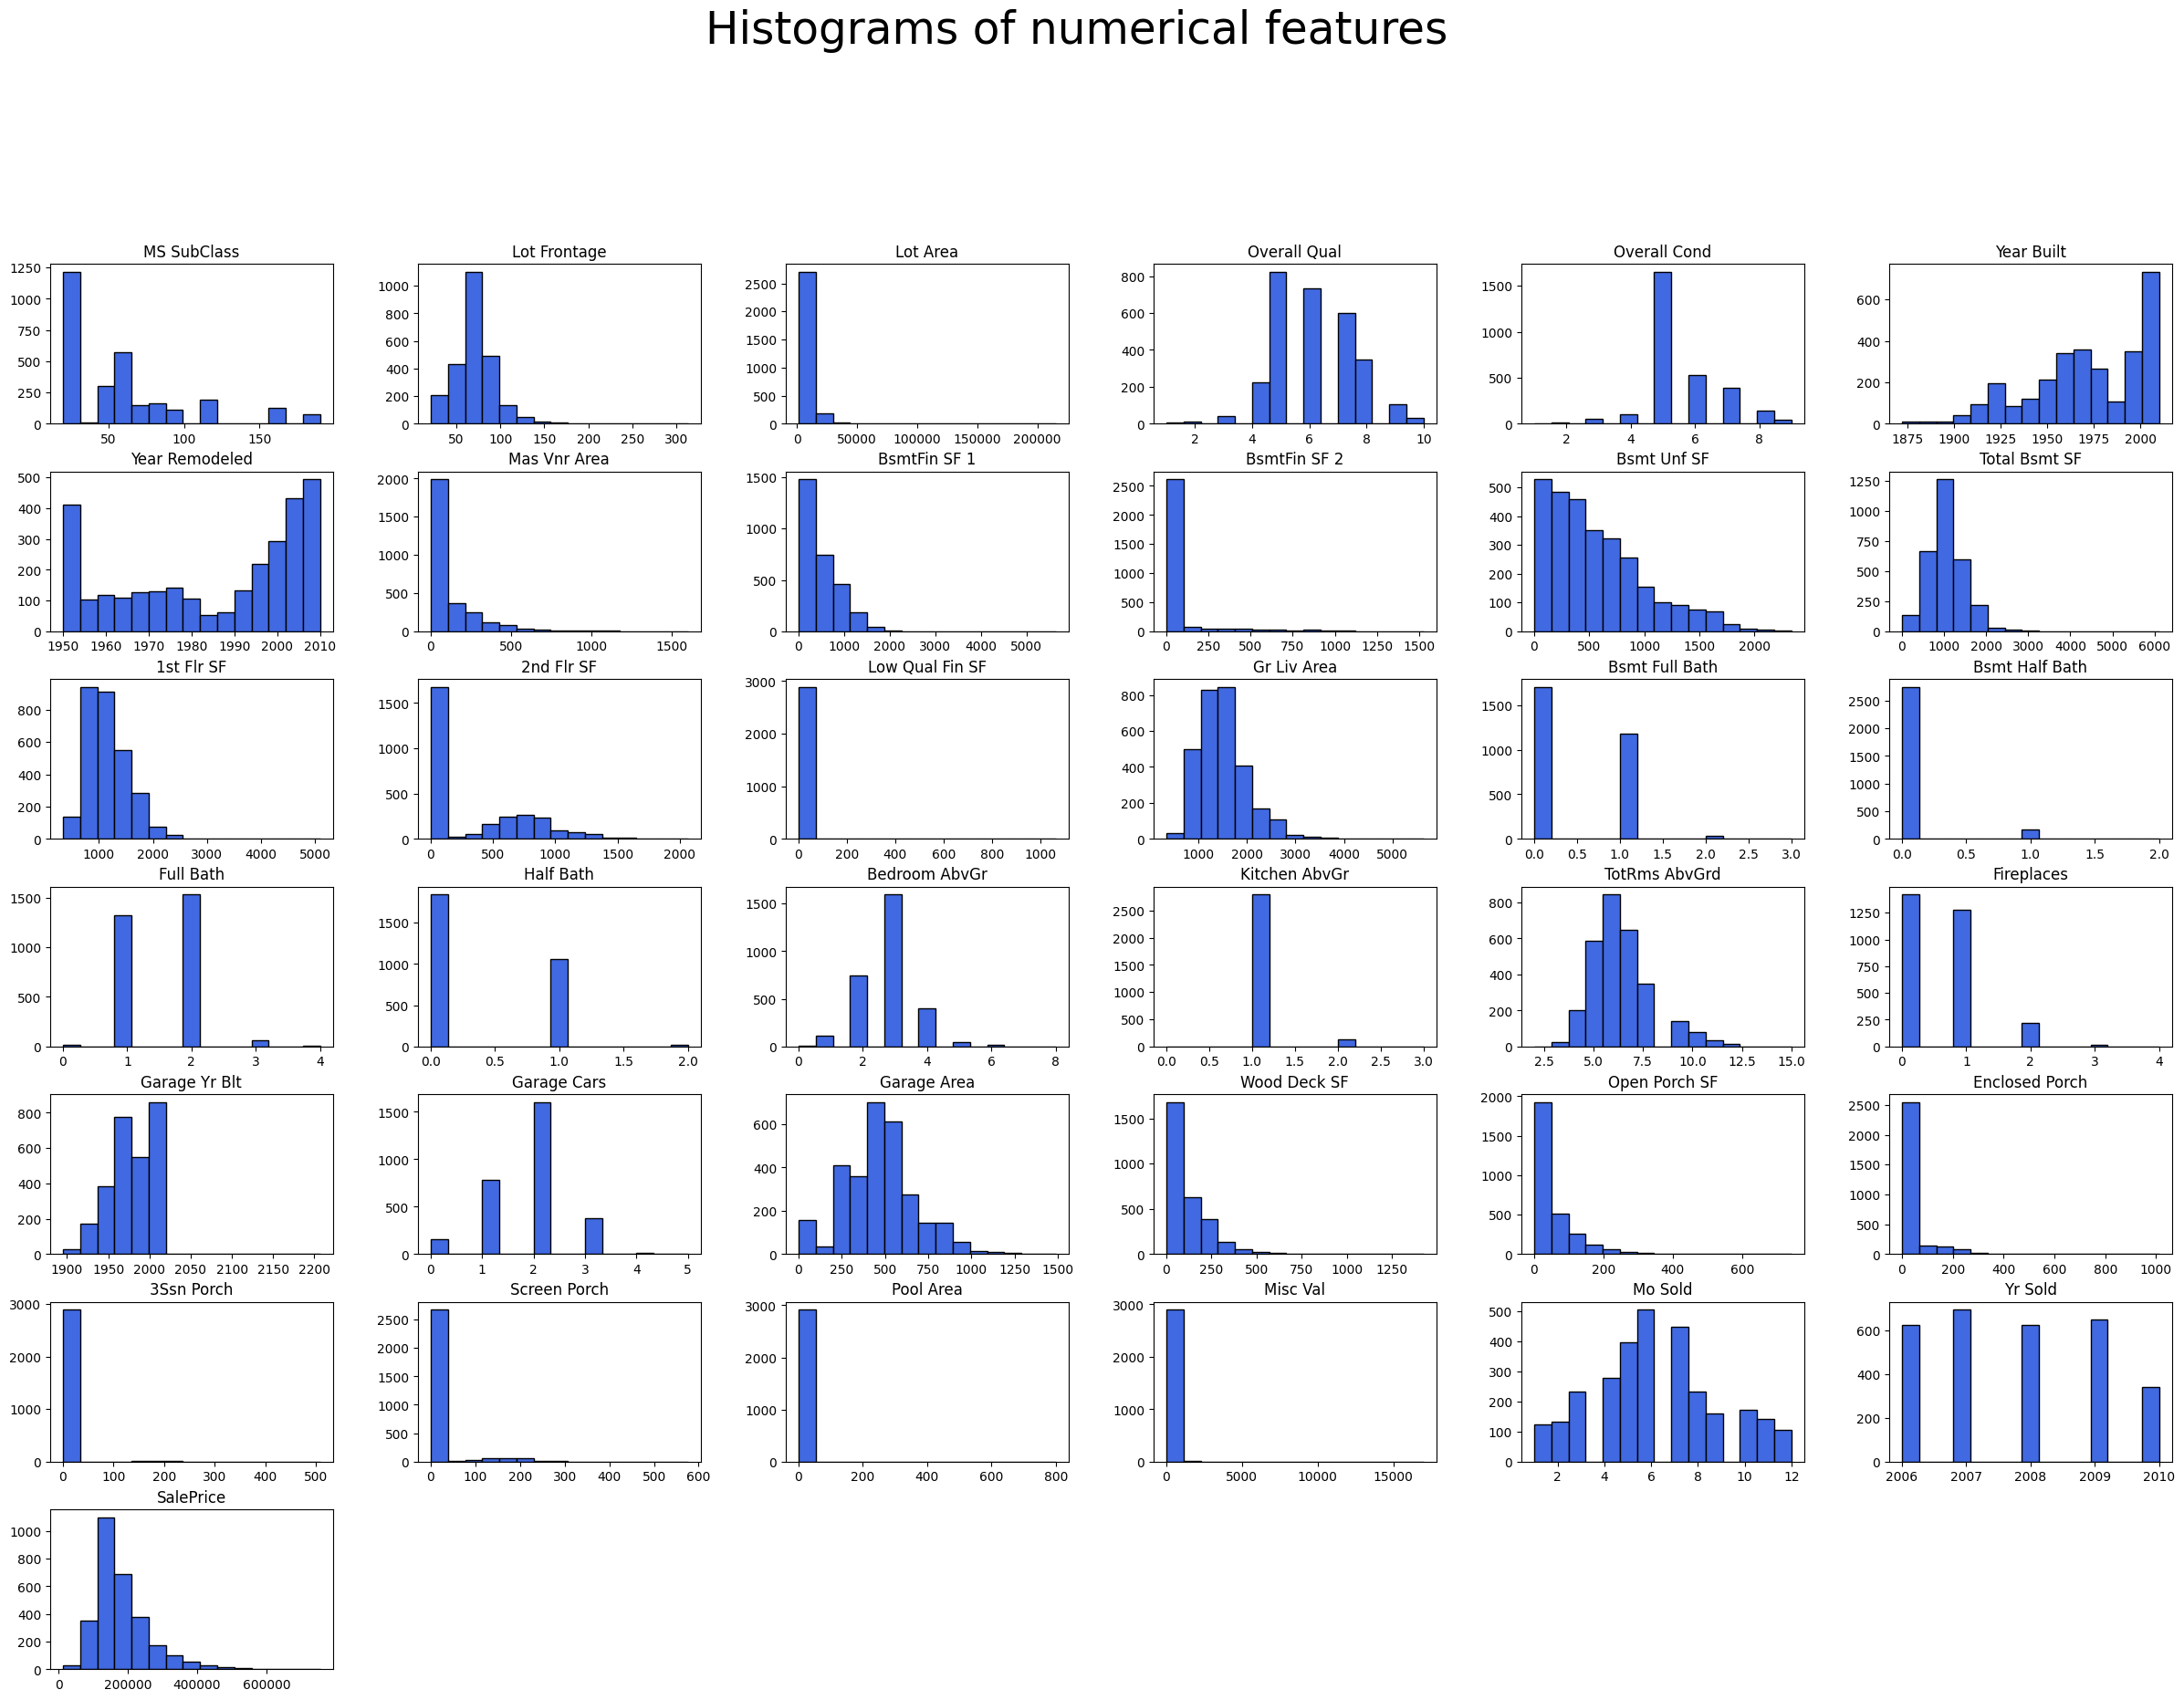

In [114]:
## Step 2 Visualize data to gain insights (Histograms)

# Plot histogram of numerical features using DataFrame.hist(figsize=(30,20)). 

house_data_df.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of numerical features', x = 0.5, y = 1.02, size = 35)


In [115]:
import os
# Create output directory if it doesn't exist
output_dir = "histograms"
os.makedirs(output_dir, exist_ok=True)

# Plot and save histogram for each numerical feature
num_cols = house_data_df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure()
    house_data_df[col].hist(bins=15, edgecolor='black', color='royalblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{col}_hist.png"))
    plt.close()

In [116]:
## Step 2 Visualize data to gain insights  (Correlations)

# Check correlation of 'SalePrice' with others features using DataFrame.corr()
# check each column value 
feature_corr = house_data_df[['SalePrice', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 
                              'Overall Cond', 'Year Built', 'Year Remodeled', 'Mas Vnr Area', 
                              'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                              '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 
                              'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 
                              'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 
                              'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 
                              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 
                              'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']]
# Calculate the correlation matrix
feature_corr = feature_corr.corr()
#feature_corr.sort_values(by='SalePrice', ascending = False)
feature_corr[['SalePrice']].sort_values('SalePrice', ascending = False)

# or 
#feature_corr = house_data_df.corr()
#descending_feature_corr = feature_corr.unstack()
#descending_feature_corr = descending_feature_corr.sort_values(kind="quicksort", ascending=False)
#print(descending_feature_corr["SalePrice"])


,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remodeled,0.532974


<Axes: >

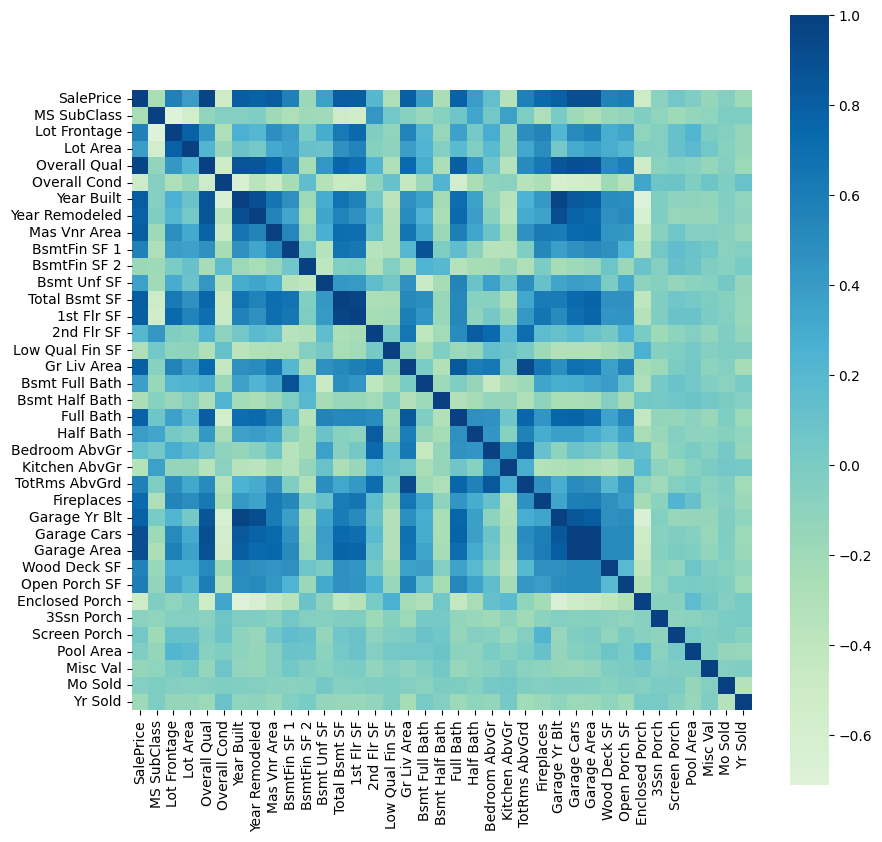

In [117]:
correlation = feature_corr.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1, center=0,square=True,cmap = 'GnBu')

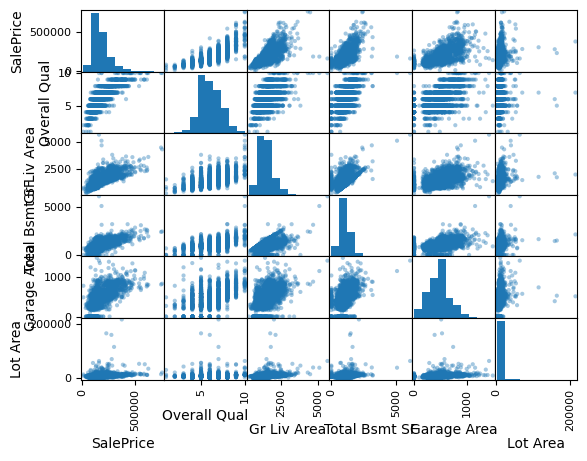

In [118]:
## Step 2 Visualize data to gain insights (Scatterplots)

from pandas.plotting import scatter_matrix
scatter_features = ['SalePrice','Overall Qual','Gr Liv Area','Total Bsmt SF','Garage Area','Lot Area']

pd.plotting.scatter_matrix(house_data_df[scatter_features], alpha=0.4)
plt.show()


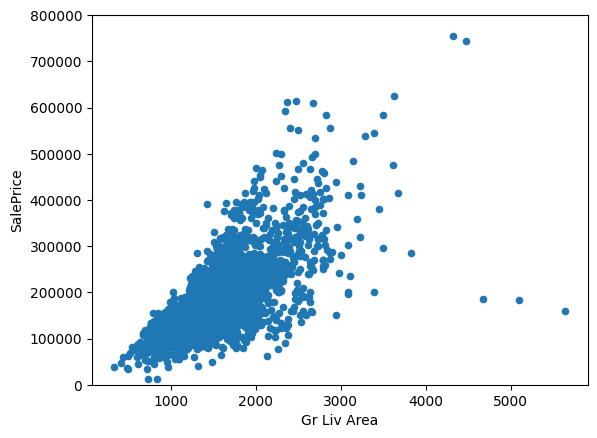

In [119]:
## Step2 Visualize data to gain insights (scatterplot-detailed)
# other solution
data = pd.concat([house_data_df['SalePrice'], house_data_df['Gr Liv Area']], axis=1)
data.plot.scatter(x='Gr Liv Area', y='SalePrice',ylim=(0,800000));

# sns.scatterplot(x='Gr Liv Area', y='SalePrice', data = house_data_df)
# plt.show()


In [120]:
# Removing houses with GrLivArea of more than 4000, as these contain outliers
df_outlier = house_data_df.loc[house_data_df['Gr Liv Area'] > 4000]
house_data_df = house_data_df.drop(df_outlier.index)
print(house_data_df.shape)


(2925, 80)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\831825245.py:6: FutureWarning: The provided callable <function median at 0x00000223ADCB05E0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = house_data_df.pivot_table(index='Overall Qual', values='SalePrice', aggfunc=np.median)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\831825245.py:10: FutureWarning: The provided callable <function median at 0x00000223ADCB05E0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  quality_pivot = house_data_df.pivot_table(index='Sale Condition', values='SalePrice', aggfunc=np.median)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\831825245.py:14: FutureWarning: The provided callable <function median at 0x00000223ADCB05E0>

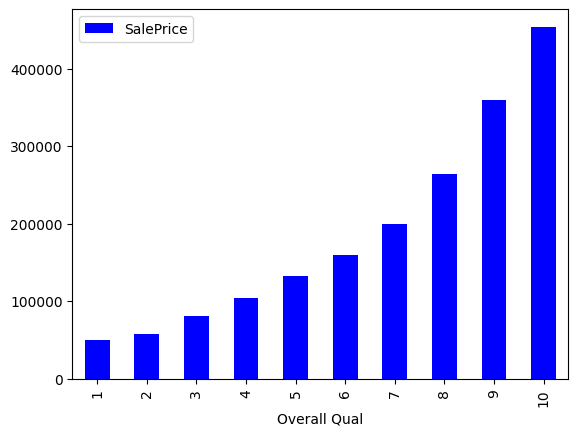

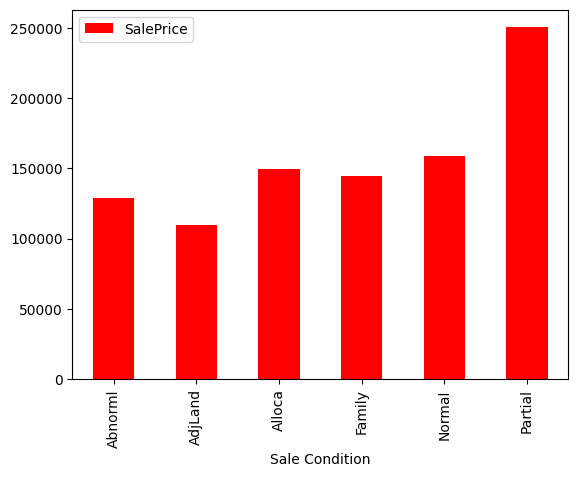

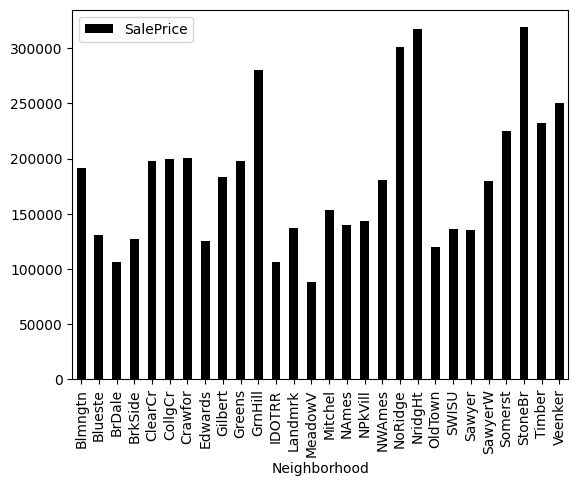

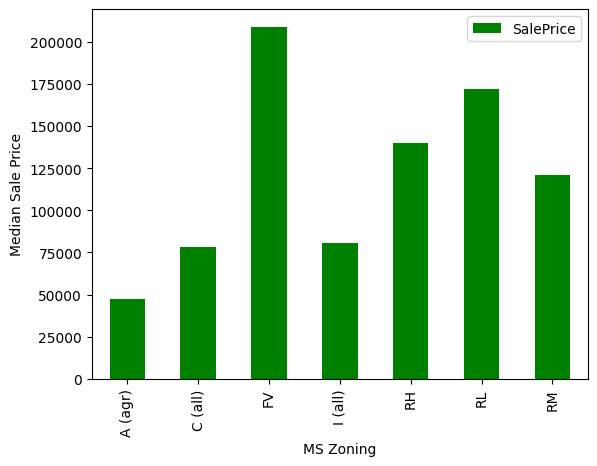

In [121]:
## Step 2 Visualize data to gain insights (Pivot table)

# Plot pivot tables using DataFrame.pivot_table() 

# Pivot table to investigate relationship of OveralQual and SalePrice
quality_pivot = house_data_df.pivot_table(index='Overall Qual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='Overall Quality',color='blue')

# Pivot table to evaluate relationship of SaleCondition and SalePrice
quality_pivot = house_data_df.pivot_table(index='Sale Condition', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='SaleCondition',color='red')

# Pivot table to evaluate relationship of Neighborhood and SalePrice
quality_pivot = house_data_df.pivot_table(index='Neighborhood', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='Neighborhood',color='black')

# Pivot table to evaluate relationship of MSZoning and SalePrice
quality_pivot = house_data_df.pivot_table(index='MS Zoning', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar',label='MSZoning',color='green')

plt.ylabel('Median Sale Price')
plt.show()

# Các biểu đồ và hình minh họa cung cấp những hiểu biết quan trọng về bộ dữ liệu nhà ở Ames:

- Phần lớn các đặc trưng số, bao gồm 'SalePrice', có phân phối lệch phải, cho thấy sự tồn tại của ngoại lệ và cần thiết phải biến đổi dữ liệu.
- Có mối tương quan dương mạnh giữa 'SalePrice' với các đặc trưng như 'Overall Qual', 'Gr Liv Area', và 'Total Bsmt SF', thể hiện rõ qua heatmap và scatterplot.
- Các ngoại lệ, đặc biệt ở 'Gr Liv Area', đã được xác định và loại bỏ để nâng cao chất lượng mô hình.
- Các biến phân loại như 'Overall Qual', 'Neighborhood', và 'MS Zoning' có ảnh hưởng lớn đến giá nhà, thể hiện qua các bảng pivot.
- Phân phối của 'Year Built' và 'Year Remodeled' cho thấy phần lớn nhà được xây dựng hoặc cải tạo trong một số giai đoạn nhất định, điều này có thể ảnh hưởng đến giá bán.

Những phát hiện này giúp định hướng cho việc xây dựng đặc trưng và lựa chọn mô hình, nhấn mạnh vai trò quan trọng của cả biến số và biến phân loại trong dự đoán giá nhà.

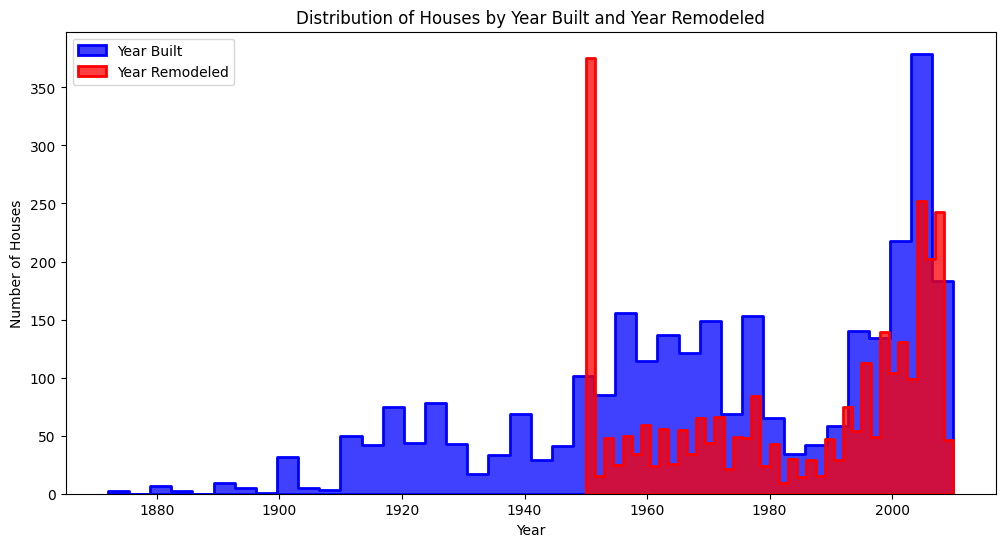

In [146]:
# Plot line histograms for 'Year Built' and 'Year Remodeled'
plt.figure(figsize=(12, 6))
sns.histplot(house_data_df['Year Built'], bins=40, kde=False, color='blue', label='Year Built', element='step', stat='count', linewidth=2)
sns.histplot(house_data_df['Year Remodeled'], bins=40, kde=False, color='red', label='Year Remodeled', element='step', stat='count', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Year Built and Year Remodeled')
plt.legend()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\2949700811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Garage Cars', data=house_data_df, palette='viridis')


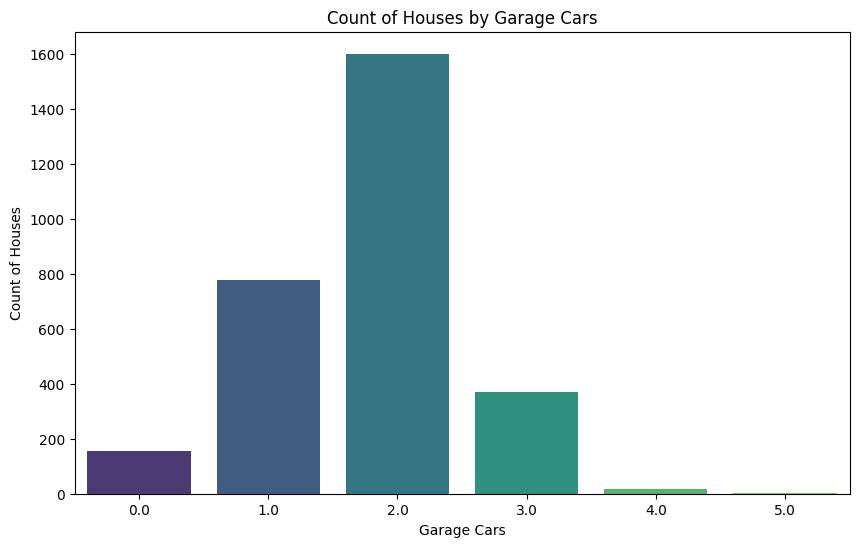

In [150]:
# Visualize data for 'Garage Cars'
plt.figure(figsize=(10, 6))
sns.countplot(x='Garage Cars', data=house_data_df, palette='viridis')
plt.title('Count of Houses by Garage Cars')
plt.xlabel('Garage Cars')
plt.ylabel('Count of Houses')
plt.show()


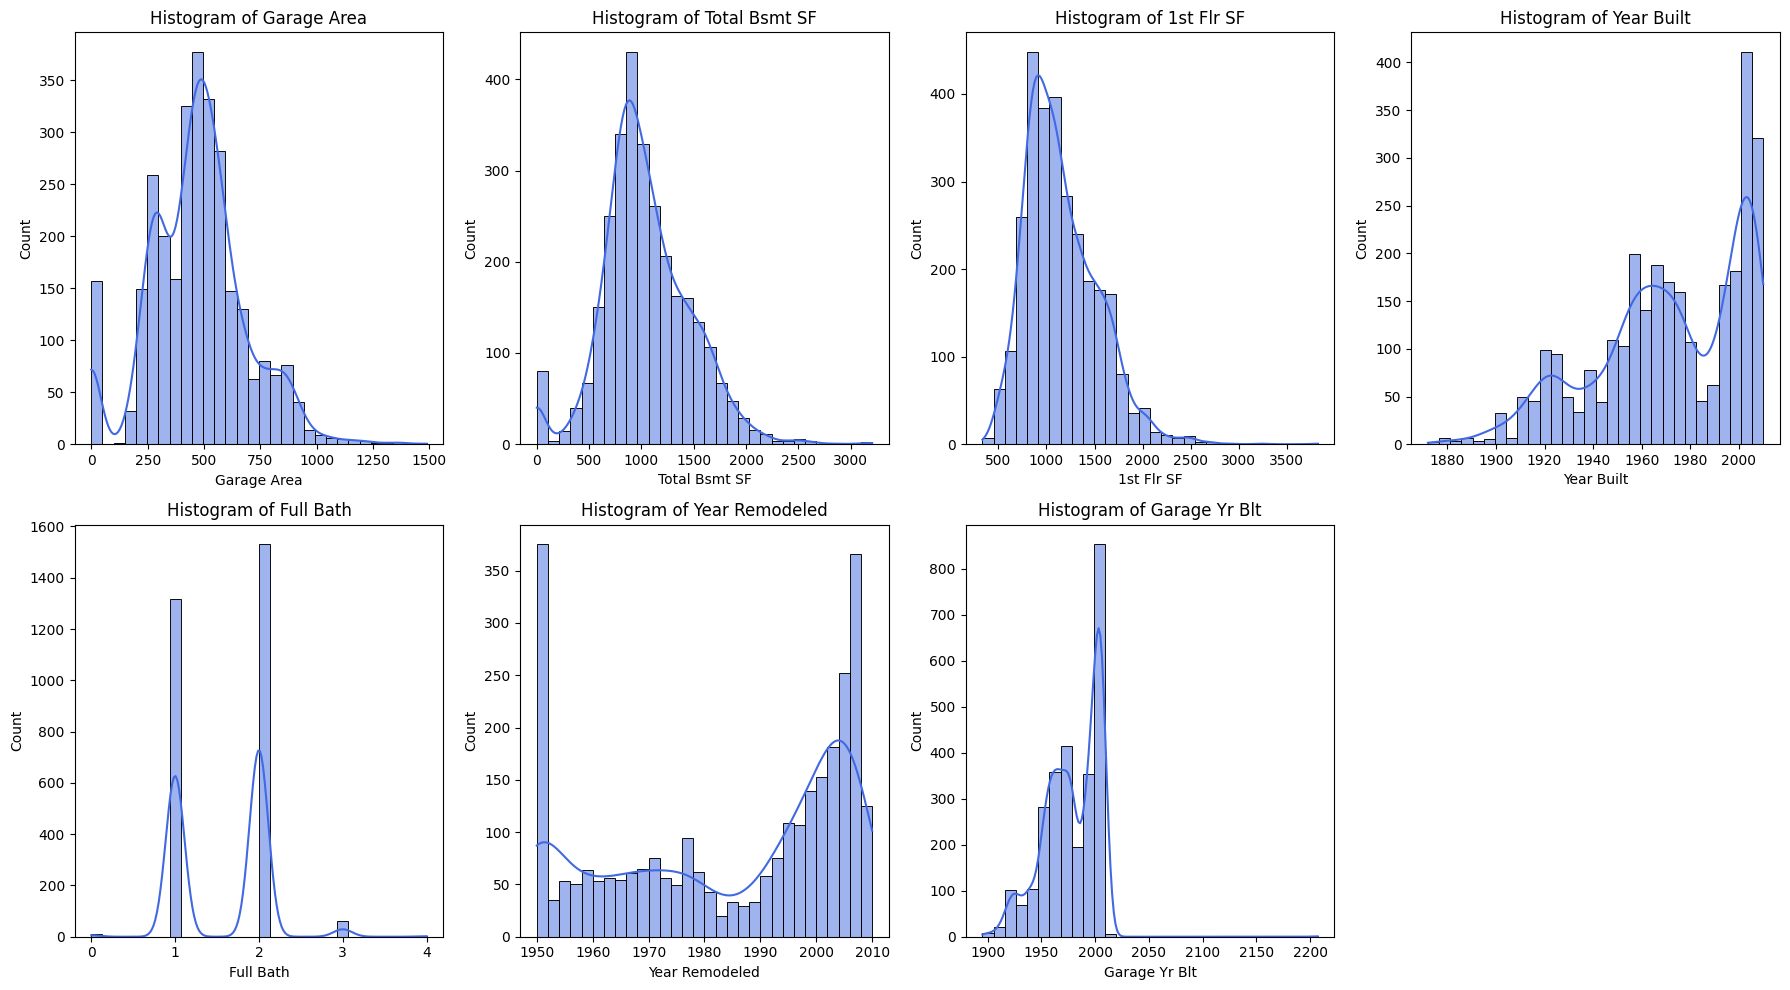

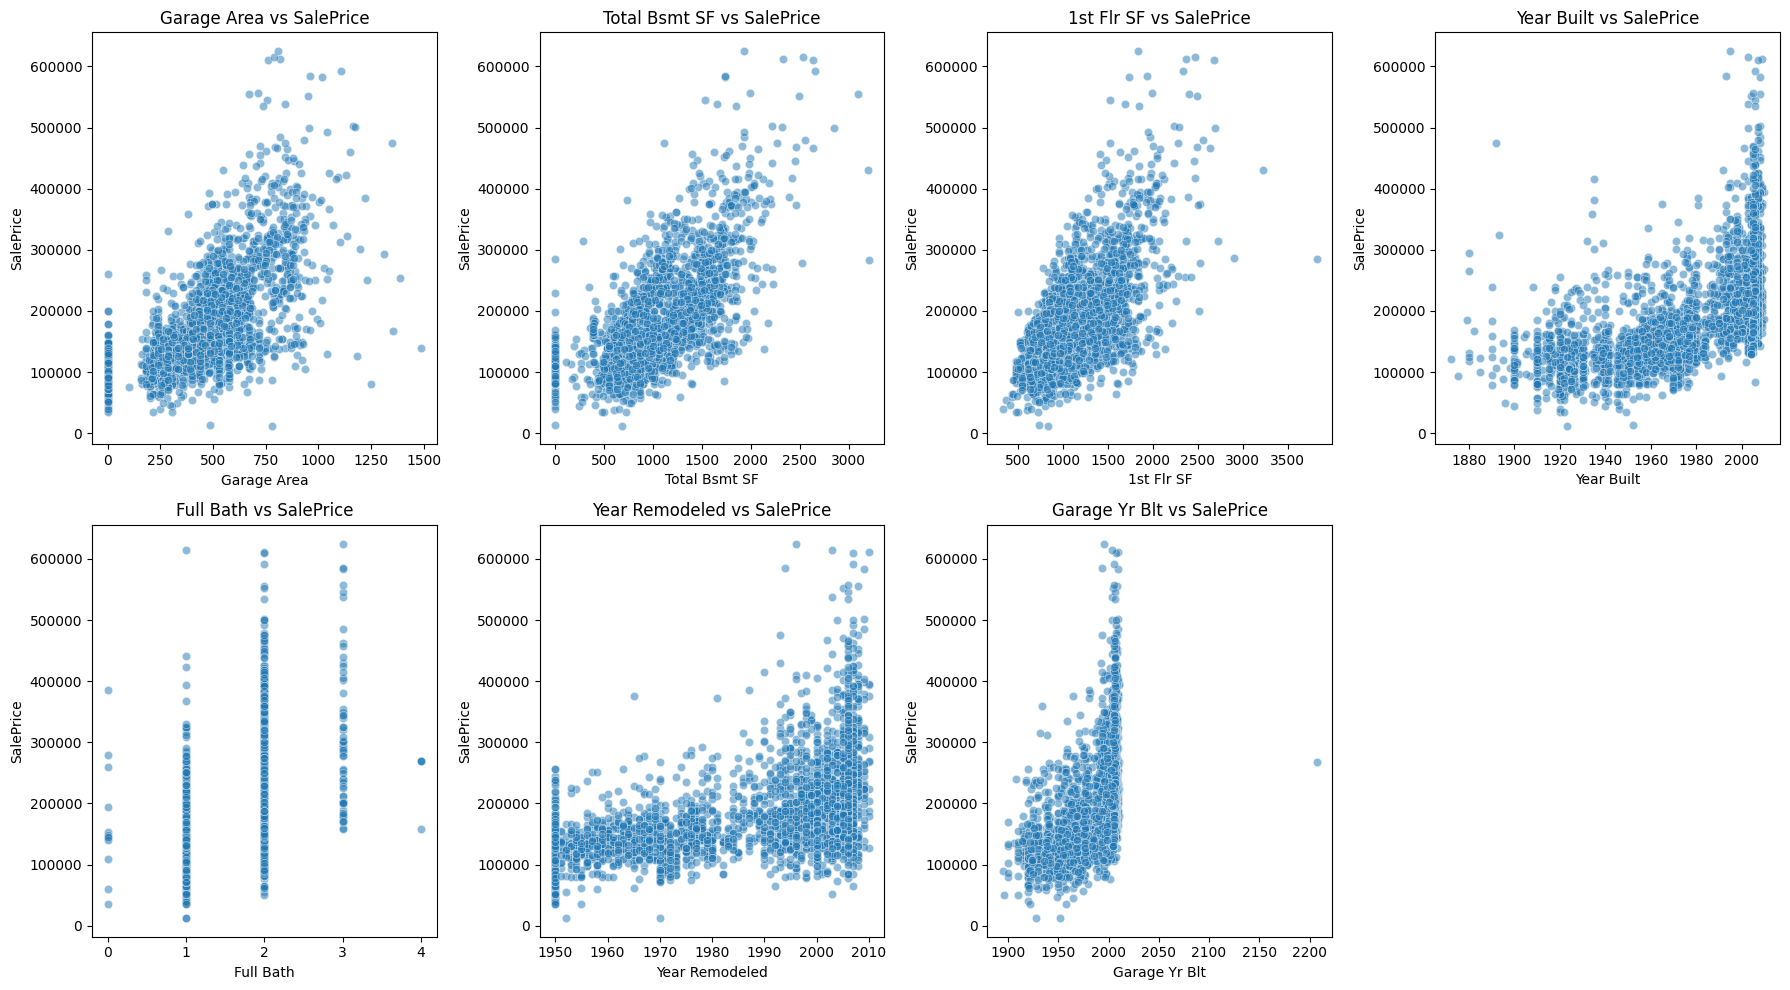

In [151]:
# Visualize distributions and relationships for selected features

selected_features = [
    'Garage Area', 
    'Total Bsmt SF', 
    '1st Flr SF', 
    'Year Built', 
    'Full Bath', 
    'Year Remodeled', 
    'Garage Yr Blt'
]

# Plot histograms for each selected feature
plt.figure(figsize=(18, 10))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(house_data_df[col], bins=30, kde=True, color='royalblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot scatterplots of each feature vs SalePrice
plt.figure(figsize=(18, 10))
for i, col in enumerate(selected_features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(x=house_data_df[col], y=house_data_df['SalePrice'], alpha=0.5)
    plt.title(f'{col} vs SalePrice')
plt.tight_layout()
plt.show()

In [ ]:
# Create the 'Visualized' directory inside 'histograms' if it doesn't exist
visualized_dir = os.path.join(output_dir, 'Visualized')
os.makedirs(visualized_dir, exist_ok=True)

# List of selected features to plot
selected_features = [
    'Garage Area', 
    'Total Bsmt SF', 
    '1st Flr SF', 
    'Year Built', 
    'Full Bath', 
    'Year Remodeled', 
    'Garage Yr Blt'
]

# Plot and save histograms for each selected feature
for col in selected_features:
    plt.figure()
    numeric_features[col].hist(bins=30, edgecolor='black', color='royalblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(visualized_dir, f"{col.replace(' ', '_')}_hist.png"))
    plt.close()

In [122]:
# Separating features and target from house dataset 
house_data_features = house_data_df.drop(columns='SalePrice', axis =1) 
house_data_target = house_data_df["SalePrice"].copy() 
house_data_target.columns = ['SalePrice']

# Print DataFrame shape of features and target variable
print('Shape of features: \n', house_data_features.shape)
print('Shape of target: \n', house_data_target.shape)
house_data_features.info()

Shape of features: 
 (2925, 79)
Shape of target: 
 (2925,)
<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2435 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overal

In [123]:
# Function to check for missing values
def checkMissing(df):
    """
    Checks missing value in a panda's dataframe and returns count
    
    Parameters
     ----------
    df: Object
        A panda's DataFrame to check for missing values
        
    Returns
     ----------
    missing: Object
            A panda's object with count of missing values
            
    """
    missing_count = df.isna().sum().sort_values(ascending= False)
    missing_count = missing_count[missing_count != 0]
    return missing_count
    

# Checking for missing values in features
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Mas Vnr Type      1774
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
BsmtFin SF 1         1
Total Bsmt SF        1
Electrical           1
Garage Cars          1
Bsmt Unf SF          1
BsmtFin SF 2         1
dtype: int64
Shape of features (1456, 79): 
 (2925, 79)
Shape of target (1456,): 
 (2925,)


In [124]:
## Step 3.1 Numeric features (Data cleaning - Handling missing values)

numeric_features= house_data_features.select_dtypes(include=[np.number])

print(numeric_features.shape)

# Print numeric_features with missing values using the 'checkMissing()' function created above 
print(checkMissing(numeric_features))

(2925, 36)
Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cars         1
BsmtFin SF 2        1
Garage Area         1
Total Bsmt SF       1
BsmtFin SF 1        1
Bsmt Unf SF         1
dtype: int64


In [125]:
## Step 3.1.1 Handling missing values of numeric features

# Fill nulls for 'LotFrontage' with median value calculated after grouping by 'Neighborhood'
house_data_features["Lot Frontage"] = house_data_features.groupby("Neighborhood")["Lot Frontage"].transform(
    lambda x: x.fillna(x.median()))

# Fill nulls for 'GarageYrBlt','MasVnrArea' with 0

for col in ('Garage Yr Blt', 'Mas Vnr Area'):
    house_data_features[col] = house_data_features[col].fillna(0)

# Check that features LotFrontage, GarageYrBl and MasVnrArea are no longer in missing value list 
print(checkMissing(house_data_features))

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Mas Vnr Type      1774
Fireplace Qu      1422
Garage Qual        159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
BsmtFin Type 1      80
Bsmt Qual           80
Lot Frontage         3
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
Electrical           1
BsmtFin SF 2         1
Garage Area          1
dtype: int64
Shape of features (1456, 79): 
 (2925, 79)
Shape of target (1456,): 
 (2925,)


f:\N21DCCN046\N4-HK2\ML\ML_pj\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\N21DCCN046\N4-HK2\ML\ML_pj\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [126]:
## Step 3.1.2 Feature Engineering for Numeric features (log-transformation)

# Check skewness of the target variable
print("Skew (no log transform): 1.565959 \n", house_data_target.skew())

# Apply log-transform on target feature 'SalePrice' using 'np.log()' function (Execute only once)
house_data_target = np.log(house_data_target)

# Check skewness of the target variable after log-transform
print("Skew (log transform): 0.065448 \n", house_data_target.skew())

# Print DataFrame shape of features and target variable
print('Shape of features (1456, 79): \n', house_data_features.shape)
print('Shape of target (1456,): \n', house_data_target.shape)

Skew (no log transform): 1.565959 
 1.5910724110509824
Skew (log transform): 0.065448 
 -0.041948054245060214
Shape of features (1456, 79): 
 (2925, 79)
Shape of target (1456,): 
 (2925,)


In [127]:
## Step 3.2 Feature Engineering for Categorical features (Handling missing values)

# Transform some numerical features that are actually categorical
for col in ['Overall Qual','MS SubClass','Overall Cond']:
    house_data_features[col].apply(str)

# Create a new object 'categorical_features' from house_data_features that contains only categorical features

categorical_features= house_data_features.select_dtypes(exclude=[np.number])


#for col in ('PoolQC', 'MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual','MasVnrType'):
    #house_data_features[col] = house_data_features[col].fillna('None')

print(checkMissing(categorical_features))

# Print missing values in categorical features using the checkMissing() function
#print(categorical_features.isnull().sum().sort_values(ascending=False))

print("Numeric features shape (1456, 36): \n", numeric_features.shape)
print("Categorical features shape (1456, 43): \n", categorical_features.shape)
print("House data features shape (1456,79): \n", house_data_features.shape)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Mas Vnr Type      1774
Fireplace Qu      1422
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Electrical           1
dtype: int64
Numeric features shape (1456, 36): 
 (2925, 36)
Categorical features shape (1456, 43): 
 (2925, 43)
House data features shape (1456,79): 
 (2925, 79)


In [128]:
## Step 3.2 Feature Engineering for Categorical features (Handling missing values)

# Fill nulls for the missing values in the specified categorical features according to the 
# data description above (3.2.1).
# Note the special description for feature 'Electrical'.

for col in ('Pool QC', 'Misc Feature','Alley','Fence','Fireplace Qu','Garage Cond','Garage Type','Garage Finish','Garage Qual','Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual'):
    house_data_features[col].fillna('None',inplace= True)

house_data_features['Electrical'].fillna('SBrkr', inplace = True)

# Check that there are no nulls in the dataframe 
print(checkMissing(house_data_features))

Mas Vnr Type      1774
BsmtFin Type 1      80
Lot Frontage         3
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\2312083897.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data_features[col].fillna('None',inplace= True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\2312083897.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [129]:
## Step 3.2 Feature Engineering for Categorical features (one-hot encoding)

# Print the shape of dataset before one-hot encoding
print('Shape of features before one-hot encoding (1456,79):\n', house_data_features.shape)

# Perform binning and convert values of 'Overall Qual and OverallCond' features

house_data_features['Overall Qual']= house_data_features['Overall Qual'].map({1:"Poor",2:'Poor',3:'Fair',4:'Average',5:'Average',6:'Good',7:'Good',8:'Excellent',9:'Excellent',10:'Excellent'})
print(house_data_features['Overall Qual'])
house_data_features['Overall Cond']= house_data_features['Overall Cond'].map({1:"Poor",2:'Poor',3:'Fair',4:'Average',5:'Average',6:'Good',7:'Good',8:'Excellent',9:'Excellent',10:'Excellent'})
print(house_data_features['Overall Cond'])

# another solution
'''
house_data_features['Overall Qual'].replace([1, 2], "Poor", inplace = True)
house_data_features['Overall Qual'].replace([3], "Fair", inplace = True)
house_data_features['Overall Qual'].replace([4, 5], "Average", inplace = True)
house_data_features['Overall Qual'].replace([6, 7], "Good", inplace = True)
house_data_features['Overall Qual'].replace([8, 9, 10], "Excellent", inplace = True)

house_data_features['Overall Cond'].replace([1, 2], "Poor", inplace = True)
house_data_features['Overall Cond'].replace([3], "Fair", inplace = True)
house_data_features['Overall Cond'].replace([4, 5], "Average", inplace = True)
house_data_features['Overall Cond'].replace([6, 7], "Good", inplace = True)
house_data_features['Overall Cond'].replace([8, 9, 10], "Excellent", inplace = True)
'''
# Perform one-hot encoding on all categorical features
categorical = []
for col in categorical_features.columns:
    categorical.append(col)
categorical.append('Overall Cond')
categorical.append('Overall Qual')

for col in categorical:
    house_data_features = pd.get_dummies(house_data_features, columns=[col])

# Print DataFrame shape of features and target variable
print('Shape of features after one-hot encoding:\n', house_data_features.shape)


Shape of features before one-hot encoding (1456,79):
 (2925, 79)
0          Good
1       Average
2          Good
3          Good
4       Average
         ...   
2925       Good
2926    Average
2927    Average
2928    Average
2929       Good
Name: Overall Qual, Length: 2925, dtype: object
0       Average
1          Good
2          Good
3       Average
4       Average
         ...   
2925       Good
2926    Average
2927    Average
2928    Average
2929    Average
Name: Overall Cond, Length: 2925, dtype: object
Shape of features after one-hot encoding:
 (2925, 322)


In [130]:
print(checkMissing(house_data_features))

Lot Frontage      3
Bsmt Full Bath    2
Bsmt Half Bath    2
Garage Cars       1
Garage Area       1
BsmtFin SF 1      1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
dtype: int64


In [131]:
# Fill missing values in house_data_features by duplicating the previous value (forward fill)
house_data_features.fillna(method='ffill', inplace=True)

# Check if any missing values remain
print(checkMissing(house_data_features))

Series([], dtype: int64)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19396\4196076526.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  house_data_features.fillna(method='ffill', inplace=True)


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
## Task 4 Train and Evaluate a simple linear regression model

#  Split dataset in training set (X_train, y_train) and test set (X_test, y_test)

X = house_data_features
y = house_data_target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Train a simple linear regression model 'lr' with training set
lr = LinearRegression()
lr.fit(X_train, y_train)
#lr.score(X_train, y_train)

# Third, print model weights(coefficients) and intercept
print("Model intercept (lr.intercept): \n ", lr.intercept_)
print("Model weights (lr.coef_) : \n ", lr.coef_)



(2340, 322) (2340,) (585, 322) (585,)
Model intercept (lr.intercept): 
  14.397432568921786
Model weights (lr.coef_) : 
  [-6.49580932e-04  3.10575710e-04  2.63988860e-06  1.88798965e-03
  9.93022097e-04  2.36961590e-05  5.49251163e-05  3.20086860e-05
  4.46783928e-07  8.73800913e-05  1.02880896e-04  9.66514539e-05
 -1.69599853e-05  1.82570227e-04  2.29397490e-02  1.39806760e-03
  1.86480601e-02  7.64761397e-03 -1.23059554e-02 -4.09989124e-02
  2.21985111e-03  2.27406034e-02  2.59151595e-04  3.20509938e-02
  2.51420358e-05  5.95745226e-05  6.45668762e-05  1.52666942e-04
  3.91707485e-05  2.14902888e-04 -4.94306686e-04  1.02838767e-05
 -2.21349759e-04 -4.64933070e-03 -9.02774405e-01  1.59380891e-02
  1.92563312e-01  2.01400322e-01  1.64577848e-01  1.87640986e-01
  1.40653848e-01 -6.75310642e-02  6.75310642e-02  5.25162854e-03
 -9.62978529e-03  4.37815675e-03  2.39176746e-03  3.49843204e-03
 -1.05462350e-02  4.65603554e-03 -1.46719638e-03 -7.25326872e-03
  1.69685146e-03  7.02361364e-03 

R^2 score on trainig set:  0.9375808386295362
MSE score on trainig set:  0.009841584688043482
RMSE score on training set:  0.09920476141820755
R^2 score on test set: 0.8914247037689554
MSE score on test set:  0.01612796202206777
RMSE score on test set:  0.12699591340695876


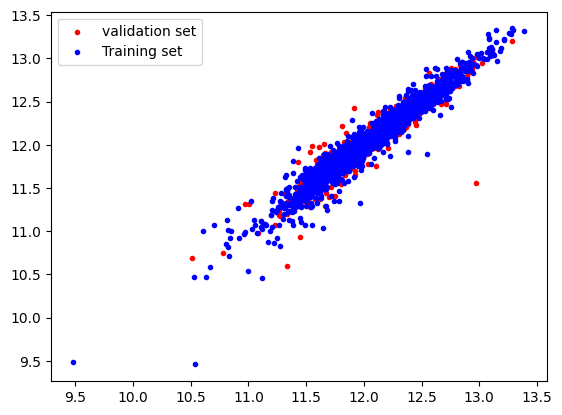

In [133]:
## Step 4 Train and Evaluate a simple linear regression mode

# Use the trained simple model to make predictions 'pred_test' on test set 'X_test' using the trained model 

pred_test = lr.predict(X_test)

# Evaluate model performance using R^2 and mean squared error on training set i.e., pred_train, y_train
pred_train = lr.predict(X_train)
R_square_train = r2_score(pred_train,y_train)
MSE_train = mean_squared_error(pred_train,y_train)
RMSE_train = root_mean_squared_error(pred_train, y_train)

print("R^2 score on trainig set: ", R_square_train)
print("MSE score on trainig set: ", MSE_train)
print("RMSE score on training set: ", RMSE_train)


# Evaluate model performance using R^2 and mean squared error on test set i.e., pred_test, y_test

R_square_test = r2_score(pred_test, y_test)
MSE_test = mean_squared_error(pred_test, y_test)
RMSE_test = root_mean_squared_error(pred_test, y_test)

print("R^2 score on test set:", R_square_test)
print("MSE score on test set: ", MSE_test)
print("RMSE score on test set: ", RMSE_test)


# Plot the linear model
plt.scatter(pred_test, y_test, color='red', marker='.', label = "validation set")
plt.scatter(pred_train, y_train, color='blue', marker='.', label = "Training set")
plt.legend()
plt.show()


In [136]:
import joblib
import os

# Create the directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the linear regression model
joblib.dump(lr, 'models/ames_house_price_linear_model.pkl')

['models/ames_house_price_linear_model.pkl']

In [137]:
## Step 5 Model refinement with regularization (Ridge regression)
from sklearn.linear_model import Ridge

# Train a ridge regression model 'ridge' with training set
lr_ridge = Ridge(alpha=0.05, random_state=0)
lr_ridge.fit(X_train, y_train)


# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
ridge_pred_train = lr_ridge.predict(X_train)
R_square_train_ridge = r2_score(ridge_pred_train,y_train)
RMSE_train_ridge = root_mean_squared_error(ridge_pred_train, y_train)

print("R^2 score on training set: ", R_square_train_ridge)
print("RMSE score on training set: ", RMSE_train_ridge)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
ridge_pred_test = lr_ridge.predict(X_test)
R_square_test_ridge =  r2_score(ridge_pred_test,y_test)
RMSE_test_ridge = root_mean_squared_error(ridge_pred_test, y_test)

print("R^2 score on test set: ", R_square_test_ridge)
print("RMSE score on test set: ", RMSE_test_ridge)


R^2 score on training set:  0.9374144104633122
RMSE score on training set:  0.0992819475219963
R^2 score on test set:  0.903739477339879
RMSE score on test set:  0.11917065938561792


In [ ]:
# save the ridge model
joblib.dump(lr_ridge, "models/ames_house_price_ridge_model.pkl")

['models/ames_house_price_ridge_model.pkl']

In [139]:
## Step 5 Model refinement with regularization (Lasso)

from sklearn.linear_model import Lasso

# Train a Lasso model 'lasso' with training set
lsr= Lasso(alpha= 0.0001)
lsr.fit(X_train, y_train)

# Make predictions 'ridge_pred_train' on train set 'X_train' using the trained model and calculate the R^2
lasso_pred_train = lsr.predict(X_train)
R_square_train_lasso = r2_score(lasso_pred_train, y_train)
RMSE_train_lasso = root_mean_squared_error(lasso_pred_train, y_train)

print("R^2 score on trainig set: ", R_square_train_lasso)
print("RMSE score on training set: ", RMSE_train_lasso)


# Make predictions 'ridge_pred_test' on test set 'X_test' using the trained model and calculate the R^2
lasso_pred_test = lsr.predict(X_test)
R_square_test_lasso = r2_score(lasso_pred_test,y_test)
RMSE_test_lasso = root_mean_squared_error(lasso_pred_test, y_test)

print("R^2 score on test set: ", R_square_test_lasso)
print("RMSE score on test set: ", RMSE_test_lasso)

# Check the number of features the model is training with
print("Number of features used(Lasso):", np.sum(lsr.coef_!=0))


R^2 score on trainig set:  0.9320121816409395
RMSE score on training set:  0.1028466370912775
R^2 score on test set:  0.9296347737027424
RMSE score on test set:  0.1011827488500674
Number of features used(Lasso): 205


In [ ]:
# save the lasso model
joblib.dump(lsr, "models/ames_house_price_lasso_model.pkl")

['models/ames_house_price_lasso_model.pkl']

In [141]:
from xgboost import XGBRegressor

# Train an XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb.fit(X_train, y_train)

# Predictions
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)

# Evaluate performance
R_square_train_xgb = r2_score(y_train, xgb_pred_train)
RMSE_train_xgb = root_mean_squared_error(y_train, xgb_pred_train)
R_square_test_xgb = r2_score(y_test, xgb_pred_test)
RMSE_test_xgb = root_mean_squared_error(y_test, xgb_pred_test)

print("XGBoost RMSE on training set:", RMSE_train_xgb)
print("XGBoost RMSE on test set:", RMSE_test_xgb)
print("XGBoost R^2 score on training set:", R_square_train_xgb)
print("XGBoost R^2 score on test set:", R_square_test_xgb)

XGBoost RMSE on training set: 0.04612415740363909
XGBoost RMSE on test set: 0.11218806000834408
XGBoost R^2 score on training set: 0.9872997025759337
XGBoost R^2 score on test set: 0.9181964421711502


In [142]:
# Save the XGBoost model
joblib.dump(lsr, "models/ames_house_price_XGBoost_model.pkl")

['models/ames_house_price_XGBoost_model.pkl']

How is the model performing on training set and test set with Lasso? Less scores indicate that you are underfitting and that it is using few number of features.

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for all models
rmse_reg_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_reg_test = np.sqrt(mean_squared_error(y_test, pred_test))

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, ridge_pred_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, ridge_pred_test))

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, lasso_pred_test))

rmse_xgb_train = np.sqrt(mean_squared_error(y_train, xgb_pred_train))
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, xgb_pred_test))

# Calculate R2 for all models
r2_reg_train = r2_score(y_train, pred_train)
r2_reg_test = r2_score(y_test, pred_test)

r2_ridge_train = r2_score(y_train, ridge_pred_train)
r2_ridge_test = r2_score(y_test, ridge_pred_test)

r2_lasso_train = r2_score(y_train, lasso_pred_train)
r2_lasso_test = r2_score(y_test, lasso_pred_test)

r2_xgb_train = r2_score(y_train, xgb_pred_train)
r2_xgb_test = r2_score(y_test, xgb_pred_test)

# Create summary table
summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'XGBoost'],
    'R2 Train': [r2_reg_train, r2_ridge_train, r2_lasso_train, r2_xgb_train],
    'R2 Test': [r2_reg_test, r2_ridge_test, r2_lasso_test, r2_xgb_test],
    'RMSE Train': [rmse_reg_train, rmse_ridge_train, rmse_lasso_train, rmse_xgb_train],
    'RMSE Test': [rmse_reg_test, rmse_ridge_test, rmse_lasso_test, rmse_xgb_test]
})

summary

,Model,R2 Train,R2 Test,RMSE Train,RMSE Test
0,Linear Regression,0.941248,0.895177,0.099205,0.126996
1,Ridge,0.941157,0.907697,0.099282,0.119171
2,Lasso,0.936855,0.933459,0.102847,0.101183
3,XGBoost,0.987300,0.918196,0.046124,0.112188


In [ ]:
# # Print all scores
# all_scores = {'Regression':[R_square_train, R_square_test], 
#               'Ridge':[R_square_train_ridge, R_square_test_ridge], 
#               'Lasso':[R_square_train_lasso, R_square_test_lasso],
#               'XGBoost':[R_square_train_xgb, R_square_test_xgb]}

# score_df = pd.DataFrame(data=all_scores)
# score_df

## Conclusion

The comparative analysis of Linear Regression, Ridge, Lasso, and XGBoost models shows that all approaches achieve strong predictive performance on the Ames housing dataset, as indicated by high R² and low RMSE values on both training and test sets. Ridge regression provides a slight improvement in generalization over standard regression by mitigating overfitting. Lasso regression achieves similar accuracy while using fewer features, making it valuable for feature selection and model interpretability. XGBoost delivers the highest training accuracy and robust test performance, demonstrating its effectiveness for capturing complex, nonlinear relationships. In practice, Ridge is often the first choice for regularization, Lasso is preferred when feature selection is important, and XGBoost is recommended for maximizing predictive accuracy in complex datasets.

Conclusion: in practice, ridge regression is usually the first choice between two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.